# Частина перша: Знайомство з Pandas.

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

tables = pd.read_html(url)
table = tables[12]

print(table)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

- Вивести перші рядки таблиці за допомогою методу head

In [3]:
print(table.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


- Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [4]:
rows, columns = table.shape

print("Rows:", rows)
print("Columns:", columns)

Rows: 28
Columns: 9


- Замініть у таблиці значення "—" на значення NaN

In [5]:
table = table.replace("—", np.nan, regex=True)
print(table)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

- Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [6]:
column_types = table.dtypes
print(column_types)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [7]:
for index, column in enumerate(table.columns):
    if index != 0 and table[column].dtype == object:
        table[column] = pd.to_numeric(table[column], errors='coerce')

column_types = table.dtypes

print(column_types)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


- Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [8]:
missing_values_ratio = table.iloc[:, 1:].isnull().sum() / len(table)

print(missing_values_ratio)

1950    0.071429
1960    0.035714
1970    0.035714
1990    0.000000
2000    0.000000
2012    0.000000
2014    0.071429
2019    0.142857
dtype: float64


- Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [9]:
table = table.drop(index=len(table) - 1)

print(table)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

- Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [10]:
table = table.fillna(table.mean(numeric_only=True))
numeric_columns = table.select_dtypes(include=[np.number]).columns
table[numeric_columns] = table[numeric_columns].astype(int)

print(table)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим   230   206   160   130    73   126   111    80
1           Вінницька   224   192   142   124    84   112   109    76
2           Волинська   247   250   179   153   112   148   141   101
3    Дніпропетровська   204   204   151   123    71   112   111    71
4            Донецька   271   214   140   109    61    98    82    80
5         Житомирська   261   223   159   129    89   122   120    79
6        Закарпатська   314   273   207   168   115   151   146   104
7          Запорізька   219   197   150   124    71   106   106    68
8   Івано-Франківська   243   248   182   155   103   124   122    88
9            Київська   204   189   156   123    73   122   121    80
10     Кіровоградська   216   171   145   126    79   110   108    68
11          Луганська   262   235   144   116    62    96    51    80
12          Львівська   234   240   171   140    91   119   119    87
13       Миколаївськ

- Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [11]:
average_birth_rate_2019 = table.iloc[:, -1].mean()
regions_higher_than_average_2019 = table[table.iloc[:, -1] > average_birth_rate_2019].iloc[:, 0]

print(regions_higher_than_average_2019)

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


- У якому регіоні була найвища народжуваність у 2014 році?

In [12]:
birth_rate_column_2014 = table.iloc[:, -2]
region_column = table.iloc[:, 0]
region_with_highest_birth_rate_2014 = region_column.iloc[birth_rate_column_2014.idxmax()]

print(region_with_highest_birth_rate_2014)

Рівненська


- Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

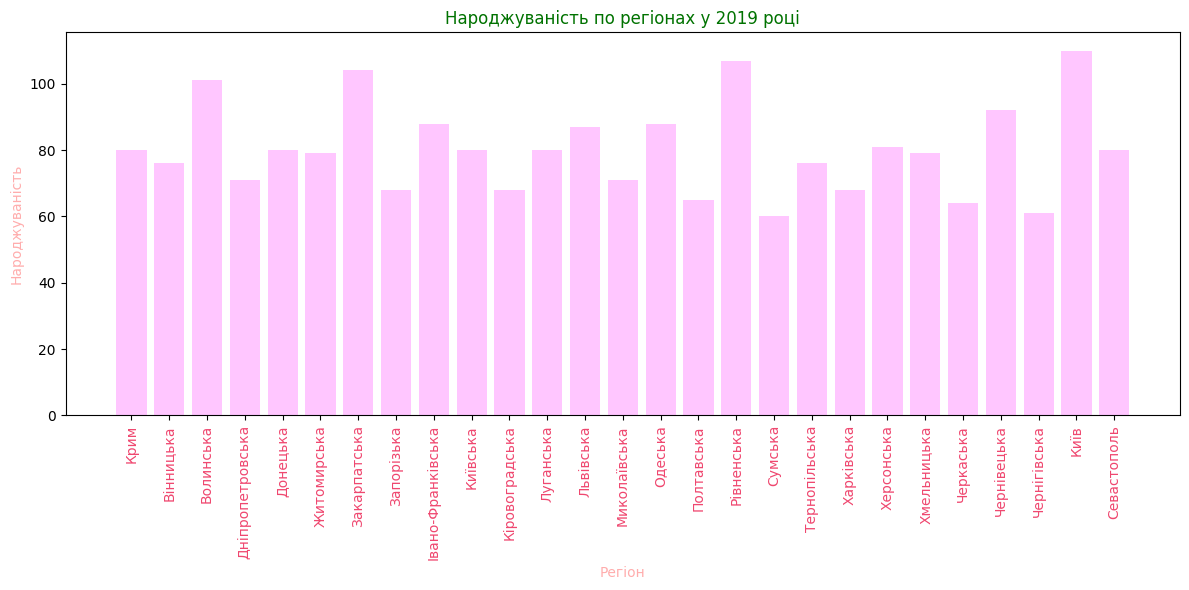

In [13]:
birth_rate_column_2019 = table.iloc[:, -1]
region_column = table.iloc[:, 0]

plt.figure(figsize=(12, 6))
plt.bar(region_column, birth_rate_column_2019, color='#FFC6FF')
plt.xticks(rotation='vertical', color="#ef476f")
plt.xlabel('Регіон', color="#FFADAD")
plt.ylabel('Народжуваність', color="#FFADAD")
plt.title('Народжуваність по регіонах у 2019 році', color="#007200")
plt.tight_layout()
plt.show()

In [14]:
birth_rate_columns = table.columns[1:]
regions = table[table.columns[0]]

### Chart 1
список регіонів з середнім значенням рівня народжуваності з 1950 року по 2019 рік

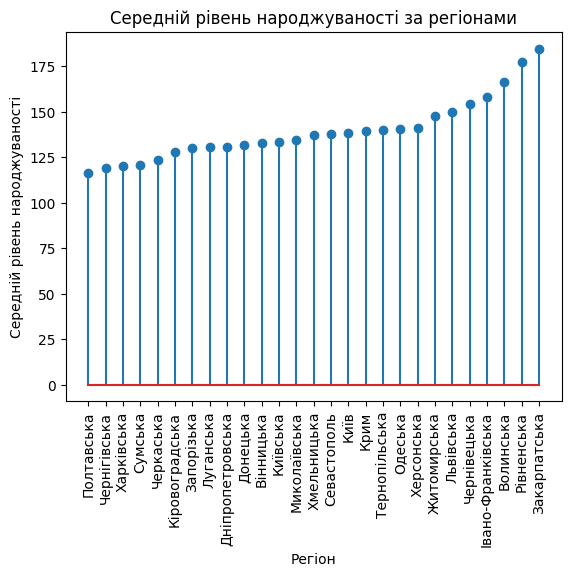

In [15]:
average_birth_rate = table[birth_rate_columns].mean(axis=1)

data = pd.DataFrame({'Регіон': regions, 'Середній рівень народжуваності': average_birth_rate})
data = data.sort_values('Середній рівень народжуваності')

plt.stem(data['Регіон'], data['Середній рівень народжуваності'])
plt.xticks(rotation=90)
plt.xlabel('Регіон')
plt.ylabel('Середній рівень народжуваності')
plt.title('Середній рівень народжуваності за регіонами')
plt.show()

### Chart 2
Рівень народжуваності за період з 1950 по 2019 для 5 регіонів з найбільшою середньою народжуваністю

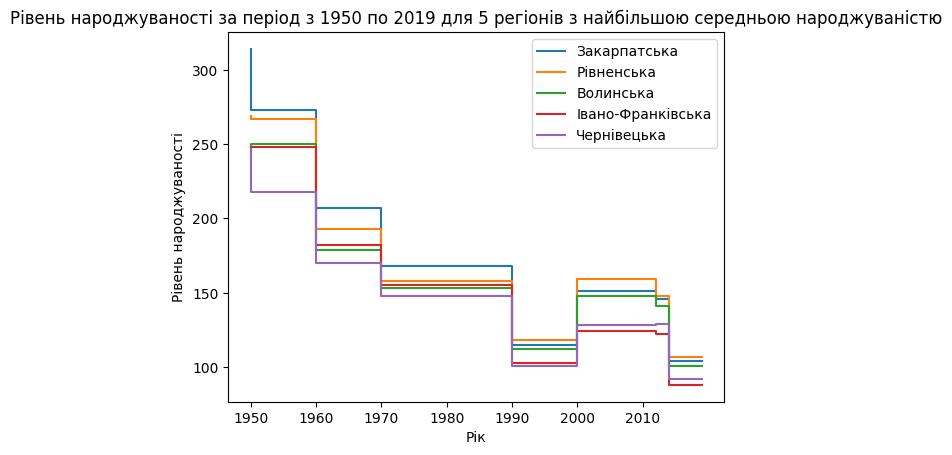

In [16]:
average_birth_rate = table[birth_rate_columns].mean(axis=1)
sorted_regions = average_birth_rate.nlargest(5).index

fig, ax = plt.subplots()

for region in sorted_regions:
    birth_rates = table.loc[region, birth_rate_columns].values
    years = table.columns[1:].astype(int)
    ax.step(years, birth_rates, label=region)

plt.xticks(np.arange(min(years), max(years)+1, 10))
plt.xlabel('Рік')
plt.ylabel('Рівень народжуваності')
plt.title('Рівень народжуваності за період з 1950 по 2019 для 5 регіонів з найбільшою середньою народжуваністю')
plt.legend(labels=regions[sorted_regions])
plt.show()

### Chart 3
Загальний рівень народжуваності по регіонам

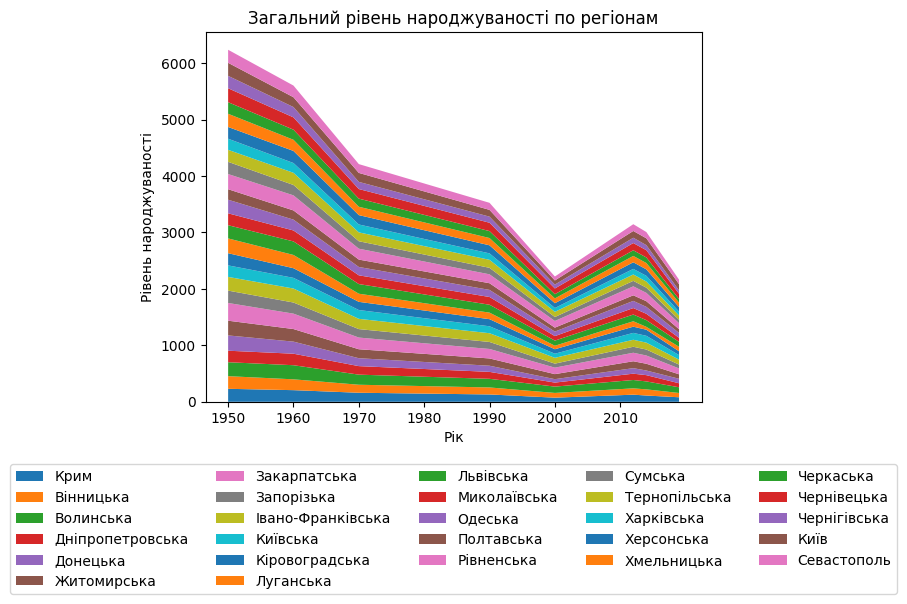

In [17]:
birth_rates = table[birth_rate_columns].values.T
years = table.columns[1:].astype(int)

fig, ax = plt.subplots()

ax.stackplot(years, *birth_rates.T, labels=regions)
plt.xticks(np.arange(min(years), max(years)+1, 10))
plt.xlabel('Рік')
plt.ylabel('Рівень народжуваності')
plt.title('Загальний рівень народжуваності по регіонам')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.show()